In [1]:
from src.Sonufy import *
from src.AudioDataGenerator import AudioDataGenerator
import matplotlib.pyplot as plt

In [2]:
adg = AudioDataGenerator(batch_size=32, input_size=(64,1030), output_size=(64,64), directory='data/mels', shorten_factor=2)

Found 131278 files for prediction set


In [3]:
sonufy = Sonufy(latent_dims=64, output_size=(64,64), final_shorten_factor=2)

In [4]:
sonufy.build_model(filters=(16,32,64,256,512))

In [11]:
sonufy.train(mel_directory='data/mels', epochs=10, train_test_split=.02, batch_size=128, sample_size=100000)

Found 98000 files for training set
Found 2000 files for testing set
Epoch 1/10
765/765 [==============================] - 270s 351ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 2/10
765/765 [==============================] - 263s 344ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 3/10
765/765 [==============================] - 257s 335ms/step - loss: 0.0056 - val_loss: 0.0057
Epoch 4/10
531/765 [===================>..........] - ETA: 1:18 - loss: 0.0056

KeyboardInterrupt: 

In [ ]:
sonufy.save_encoder('data/test_64dim')
sonufy.build_vectors_from_model(mel_directory='data/mels', all_tracks_file='data/all_tracks_shuffled.feather')
sonufy.save('data/test_64dim')

2022-09-07 16:22:44.034 WARNING absl: Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 5 of 6). These functions will not be directly callable after loading.
2022-09-07 16:22:44.248 INFO    tensorflow: Assets written to: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmpeg0hr930/assets
2022-09-07 16:22:45.328832: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-09-07 16:22:45.328852: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-09-07 16:22:45.328946: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmpeg0hr930
2022-09-07 16:22:45.332297: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-09-07 16:22:45.332310: I tens

Encoder saved to "data/test_64dim".
Getting predictions from autoencoder...


INFO: Applying 1 TensorFlow Lite delegate(s) lazily.


In [11]:
sonufy.tracks

,track_id,filename,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,...,latent_62,latent_63,track_name,track_preview_link,track_popularity,track_uri,artist_name,artist_id,artist_popularity,release_date
0,6TmHgMdkP4ZGliCKnfcHvd,6TmHgMdkP4ZGliCKnfcHvd.npy,-0.188232,0.580566,0.927734,0.020737,0.103699,0.042999,0.250244,-0.860840,...,0.053192,0.296143,Hun Er Forelska I Lærer’n,https://p.scdn.co/mp3-preview/eb09b27926aebfd6...,45,spotify:track:6TmHgMdkP4ZGliCKnfcHvd,Flöber,1fcZ5xS3sNC2USFveWZA7t,40,2022-02-11
1,1rIxb5rv6BUWXT6xmLt91x,1rIxb5rv6BUWXT6xmLt91x.npy,-1.778320,0.571777,-2.228516,0.551758,-0.435303,-0.965820,-0.603027,-0.672852,...,-0.693359,-0.033997,Ahmed,https://p.scdn.co/mp3-preview/49a36a5365e52af5...,49,spotify:track:1rIxb5rv6BUWXT6xmLt91x,Acid Pauli,3LHqODf1hGAgZ5LTw1Gf4C,48,None
2,7kV031B2WzGXdxiMXetkJl,7kV031B2WzGXdxiMXetkJl.npy,0.914551,0.438965,-0.339355,0.508789,0.459717,1.460938,0.369141,0.252441,...,0.238647,0.834473,Dishonorable Discharge,https://p.scdn.co/mp3-preview/85ae9110225e2570...,33,spotify:track:7kV031B2WzGXdxiMXetkJl,Vado,4ubKsFJjMgWkARG6w2Qlv8,43,2021-06-04
3,0jHt88E5zeabxoTM3c0W1t,0jHt88E5zeabxoTM3c0W1t.npy,-0.304443,0.989746,0.580566,1.041016,-0.456787,1.639648,-1.311523,1.580078,...,0.623047,1.081055,Unretrofied,https://p.scdn.co/mp3-preview/c28f9ec59f3d1ecb...,37,spotify:track:0jHt88E5zeabxoTM3c0W1t,The Dillinger Escape Plan,7IGcjaMGAtsvKBLQX26W4i,44,None
4,61hq8OZbgdtRANT5buZ8az,61hq8OZbgdtRANT5buZ8az.npy,-1.113281,-0.061951,-1.528320,-0.395020,1.163086,-0.730957,-1.241211,-0.137451,...,-0.277832,0.772949,Ça s'régale,https://p.scdn.co/mp3-preview/0f9d9bd93b3b7947...,27,spotify:track:61hq8OZbgdtRANT5buZ8az,Sinsémilia,7xtiaP8V8z95pASVuIrCRY,42,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128998,3cvW37LXNKEZAY0akKEL9U,3cvW37LXNKEZAY0akKEL9U.npy,-0.585449,0.350098,-1.118164,-0.942383,0.026886,-0.774414,0.905762,-0.971191,...,-0.467773,0.083557,Leaden Skies,https://p.scdn.co/mp3-preview/56484f9e08f64fbe...,3,spotify:track:3cvW37LXNKEZAY0akKEL9U,Dubrider,1iYVcxo8b71d9oT5SXpjh5,5,2018-09-07
128999,4Uj1FMr79T59Hg8FfgBjex,4Uj1FMr79T59Hg8FfgBjex.npy,0.012688,0.859863,-0.453857,0.201294,-0.624023,-0.655273,-0.375488,0.847656,...,0.704590,0.030869,Snitch to the Suture,https://p.scdn.co/mp3-preview/df9c9570ce90b697...,24,spotify:track:4Uj1FMr79T59Hg8FfgBjex,Star Fucking Hipsters,0ZyPhNogYtuJGK8ZdYQpQG,34,2008-09-30
129000,50y1hX68TJ0gyBtzcmgLKf,50y1hX68TJ0gyBtzcmgLKf.npy,-1.643555,-0.692383,-1.862305,0.970703,-0.274902,-1.276367,0.848145,-1.845703,...,-1.438477,-0.217651,Wind Blown Waltz,https://p.scdn.co/mp3-preview/2affabca3caf497a...,27,spotify:track:50y1hX68TJ0gyBtzcmgLKf,Giant Sand,339qxEdD8z8okRAiTp1HKf,29,None
129001,3euDGpS2R0NC2Xssqxohva,3euDGpS2R0NC2Xssqxohva.npy,-0.884277,-0.563965,-1.316406,-0.055084,-0.037476,0.164062,0.070007,-0.997559,...,-1.197266,-0.233887,Scarlet Begonias - 2013 Remaster,https://p.scdn.co/mp3-preview/7c0b54459124b873...,58,spotify:track:3euDGpS2R0NC2Xssqxohva,Grateful Dead,4TMHGUX5WI7OOm53PqSDAT,66,None


In [365]:
sonufy.load('data/test_128dim_newmels/')

Autoencoder loaded from "data/test_128dim_newmels/".
loaded full model
loaded encoder
Loaded tracks.
Loaded genres.
loaded scaler
loaded database files


In [366]:
test_img = adg.take(6)[0]
test_img2 = adg.take(0)[0]

Two separate images taken from different tracks:

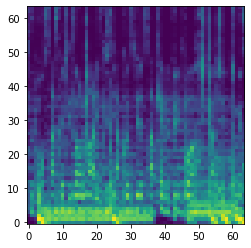

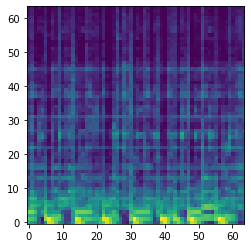

In [396]:
plt.imshow(test_img[0], origin='lower')
plt.show()
plt.imshow(test_img2[0], origin='lower')
plt.show()

Autoencoder predictions for those images.

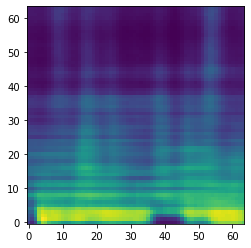

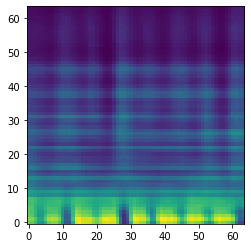

In [397]:
plt.imshow(sonufy.autoencoder(test_img)[0], origin='lower')
plt.show()
plt.imshow(sonufy.autoencoder(test_img2)[0], origin='lower')
plt.show()

Distribution comparison between two images.

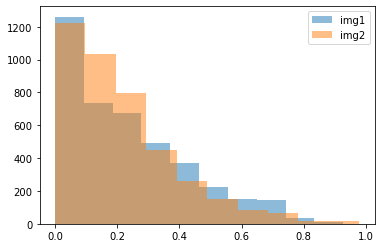

In [369]:
plt.hist(np.array(test_img[0]).reshape(-1), alpha=0.5, label='img1')
plt.hist(np.array(test_img2[0]).reshape(-1), alpha=0.5, label='img2')
plt.legend()
plt.show()

Distribution comparision between one image and the prediction.

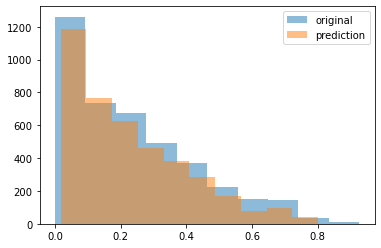

In [370]:
plt.hist(np.array(test_img[0]).reshape(-1), alpha=0.5, label='original')
plt.hist(np.array(sonufy.autoencoder(test_img)[0]).reshape(-1), alpha=0.5, label='prediction')
plt.legend()
plt.show()

comparison between encoded original and encoded prediction

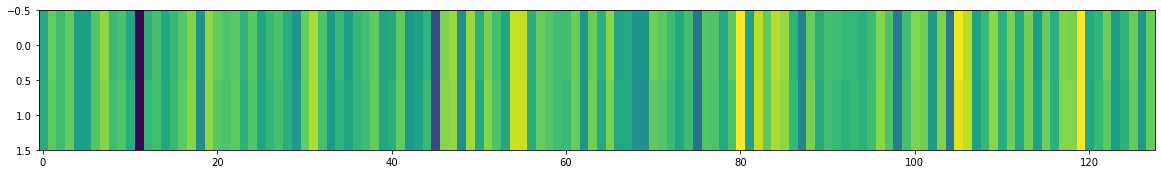

In [371]:
concat_img = np.array([sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))[0], sonufy.autoencoder.encoder(test_img)[0]])
plt.figure(figsize=(20,5))
plt.imshow(concat_img, aspect=8)

compare encoded between two images

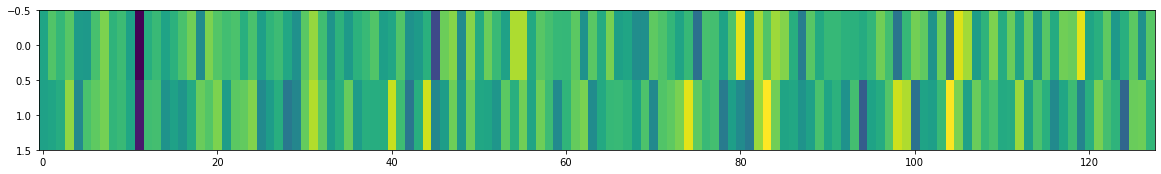

In [372]:
concat_img_compare = np.array([sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))[0], sonufy.autoencoder.encoder(sonufy.autoencoder(test_img2))[0]])
plt.figure(figsize=(20,5))
plt.imshow(concat_img_compare, aspect=8)

compare encoded between two images and the mean of the first image batch.

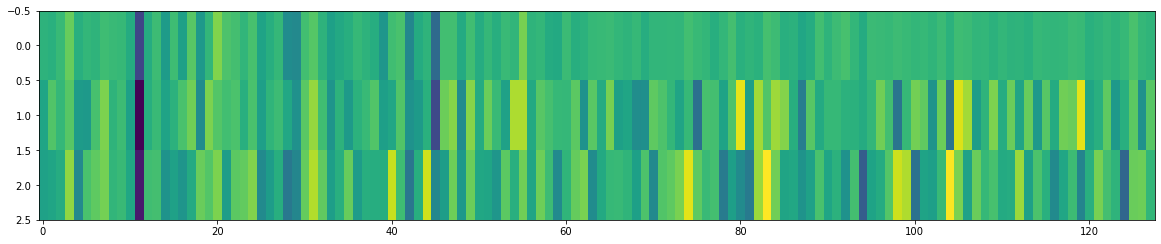

In [373]:
concat_img_compare = np.array([np.array(sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))).mean(axis=0), sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))[0], sonufy.autoencoder.encoder(sonufy.autoencoder(test_img2))[0]])
plt.figure(figsize=(20,5))
plt.imshow(concat_img_compare, aspect=8)

Look at the scale of each feature in the encoded space. Needs to be scaled which is what is happening later on.

In [374]:
pd.Series(np.array(sonufy.autoencoder.encoder(test_img)[0]).reshape(-1))

0     -2.159883
1      2.124318
2      0.064922
3      2.451025
4     -3.938225
         ...   
123   -4.000001
124   -1.224287
125    2.302783
126   -4.562623
127    2.428912
Length: 128, dtype: float32

In [375]:
concat_img_compare[0].shape

(128,)

heat map cosine similarity between encoded images for entire batch vs batch

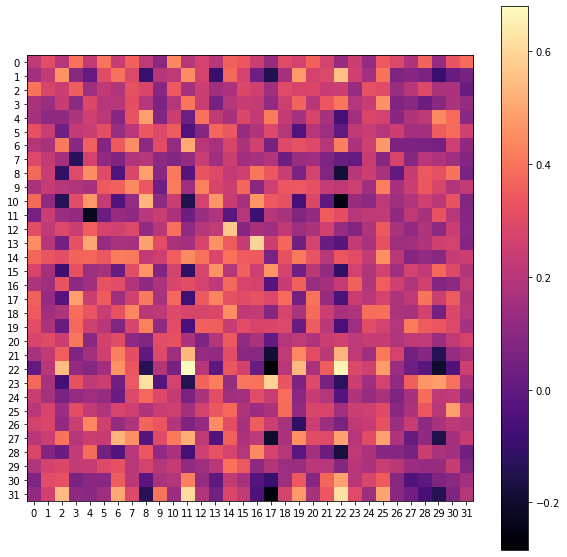

In [376]:
from sklearn.metrics.pairwise import cosine_similarity

plt.figure(figsize=(10,10))
plt.imshow(cosine_similarity(sonufy.autoencoder.encoder(test_img), sonufy.autoencoder.encoder(test_img2)), cmap='magma')
plt.xticks(ticks=range(32))
plt.yticks(ticks=range(32))
plt.colorbar()
plt.show()

cosine similarity between mean and the entire batch of the second image.

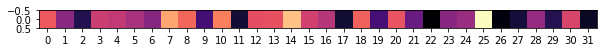

In [377]:
plt.figure(figsize=(10,10))
plt.imshow(cosine_similarity(np.array(sonufy.autoencoder.encoder(test_img)).mean(axis=0).reshape(1,-1), sonufy.autoencoder.encoder(test_img2)), cmap='magma')
plt.xticks(ticks=range(32))
plt.show()

cosine similarity between encoded space of the mean of the two images.

In [378]:
cosine_similarity(np.array(sonufy.autoencoder.encoder(test_img)).mean(axis=0).reshape(1,-1), np.array(sonufy.autoencoder.encoder(test_img2)).mean(axis=0).reshape(1,-1))


array([[0.91384816]], dtype=float32)

In [8]:
a, b, c, d = sonufy.search_for_recommendations(query='the mystery lights', get_time_and_freq=True)

INFO: Applying 1 TensorFlow Lite delegate(s) lazily.
/Users/michaelroth/miniforge3/envs/golden_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [9]:
a['name']

'Flowers in My Hair, Demons in My Head'

In [10]:
b

,track_name,track_uri,artist_name,similarity,track_popularity,time_similarity,frequency_similarity
0,Staring Contest,spotify:track:4PCcL3Yy8I1NJvD7M2Xik4,Dazzling Killmen,0.706306,12,0.834026,0.676391
1,Charlie - triple j Like A Version,spotify:track:7ogNZudeWHnDvlGOIAKfWN,Bugs,0.703054,44,0.751645,0.700144
2,Tourne la page,spotify:track:65LUFNzKnv0XBKfob3RC2X,Il Etait Une Fois,0.700713,14,0.779344,0.664733
3,Alive and Brilliant,spotify:track:3SlPal4Eu1JHNj6yubeziF,Deborah Conway,0.691066,23,0.643359,0.742653
4,Probation Blues,spotify:track:05HMVZWkKTMe2ki1FNnCmq,The Strange Boys,0.689469,17,0.881284,0.601102
5,"Running, Swimming, and Sinking",spotify:track:2NNmVGzOZrm1oNn7uWpo2E,Small Brown Bike,0.685660,13,0.869896,0.599623
6,No Time To Be 21,spotify:track:4apkpSjDP2NfnEv1ttQ7u2,The Adverts,0.677520,27,0.815049,0.598660
7,All The Way From Memphis,spotify:track:6Skd8wzI0Wv1VSJHbM3STw,James Intveld,0.677482,11,0.757892,0.655092
8,Broken,spotify:track:4u5ccLjz2SQchgltze0buE,Corpus Delicti,0.675561,23,0.798638,0.624567
9,Lass Uns Liebe Machen - Haremos El Amor,spotify:track:79VhfUijFkUYlz3uIHnEmT,Reverend Beat-Man,0.674837,16,0.806241,0.597275


In [118]:
similarity_img = np.concatenate([np.array(d), np.array(c[sonufy.latent_cols])])

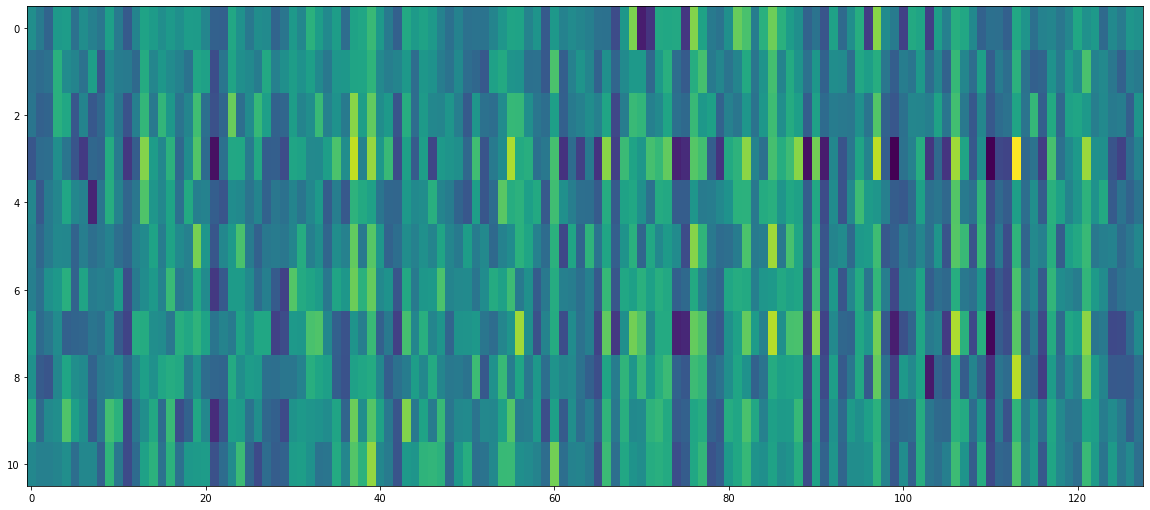

In [119]:
plt.figure(figsize=(20,10))
plt.imshow(similarity_img, aspect=5)

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [71]:
mean_squared_error(test_img[0].reshape(64,64), np.array(sonufy.autoencoder(test_img)[0]).reshape(64,64))

0.008464583422193032